# Data Overview


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("output.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4071 entries, 0 to 4070
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   img_id         4071 non-null   int64 
 1   img_extension  4071 non-null   object
 2   img_name       4071 non-null   object
 3   img_url        4071 non-null   object
 4   img_type       4071 non-null   object
 5   img_tags       4071 non-null   object
 6   img_views      4071 non-null   int64 
 7   img_likes      4071 non-null   int64 
 8   img_downloads  4071 non-null   int64 
 9   img_comments   4071 non-null   int64 
 10  author_id      4071 non-null   int64 
 11  author_name    4071 non-null   object
 12  image_query    4071 non-null   object
dtypes: int64(6), object(7)
memory usage: 413.6+ KB


In [114]:
df.head(10)

,img_id,img_extension,img_name,img_url,img_type,img_tags,img_views,img_likes,img_downloads,img_comments,author_id,author_name,image_query
0,1197800,jpg,1197800.jpg,https://pixabay.com/get/g1ec11b33b6484d08e36fc...,photo,"oldtimer, car, old car",778930,964,590709,133,2019050,Noel_Bauza,car
1,5548242,jpg,5548242.jpg,https://pixabay.com/get/g50e63aaaa5fcf3bec31ab...,photo,"car, vehicle, auto",220357,280,176363,35,18193486,18193486,car
2,63930,jpg,63930.jpg,https://pixabay.com/get/ge47a64d6085a3a321f24a...,photo,"car, vehicle, sports car",669091,583,468236,126,11884,oskaline,car
3,4322521,jpg,4322521.jpg,https://pixabay.com/get/g1aa35f7d22c8374f1544c...,photo,"fiat 500, car wallpapers, automobile",659375,1013,539470,176,2364555,NoName_13,car
4,604019,jpg,604019.jpg,https://pixabay.com/get/gc0e2685bddcb49b087266...,photo,"car, audi, auto",404360,326,295930,59,143740,jarmoluk,car
5,5880009,jpg,5880009.jpg,https://pixabay.com/get/ge79674b094ae9239c1b6b...,photo,"challenger, car, automotive",55652,96,40713,12,4745763,nickscpd,car
6,788747,jpg,788747.jpg,https://pixabay.com/get/g43a0a412d3bd99d1fad23...,photo,"auto, car, cadillac",370655,498,267966,88,524252,JOEBU-ART,car
7,3510327,jpg,3510327.jpg,https://pixabay.com/get/ge49178ee159f1f1200804...,photo,"dashboard, car, car wallpapers",246397,341,186329,72,1032521,Tama66,car
8,2209439,png,2209439.png,https://pixabay.com/get/gd3c8a2a36e9c0fd108114...,photo,"car, auto, sports car",345927,282,289976,35,322497,Mysticsartdesign,car
9,438467,jpg,438467.jpg,https://pixabay.com/get/ged10135db165c147bde34...,photo,"car race, ferrari, car",528164,475,382015,80,427519,Up-Free,car


## Data Distriburtion by Query and Image Extension

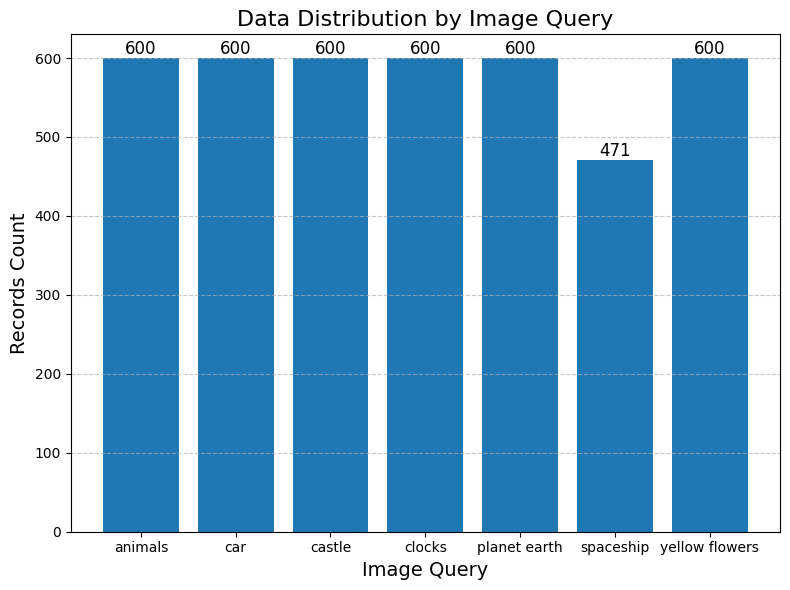

In [115]:
img_query_grouped = df.groupby("image_query")["img_id"].count()


plt.figure(figsize=(8, 6))
bars = plt.bar(img_query_grouped.index, img_query_grouped.values)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(bar.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.title('Data Distribution by Image Query', fontsize=16)
plt.xlabel('Image Query', fontsize=14)
plt.ylabel('Records Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

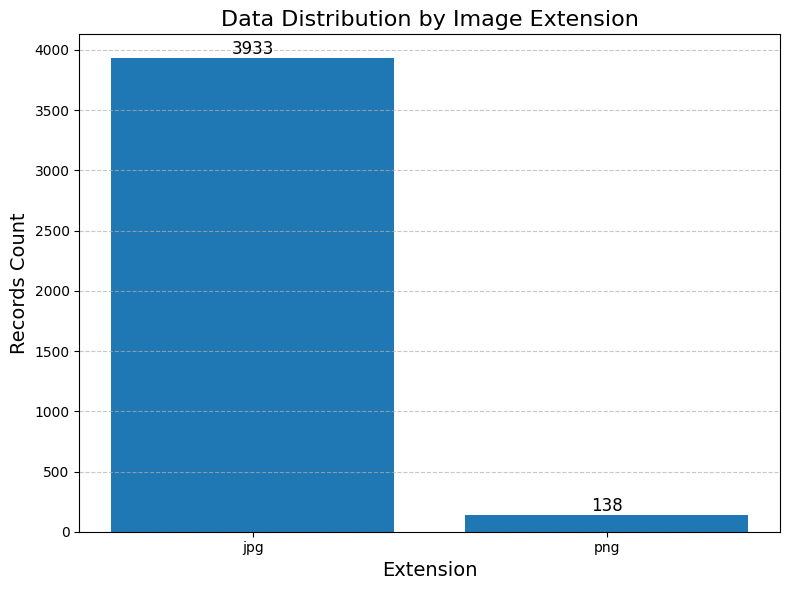

In [116]:
img_extension_grouped = df.groupby("img_extension")["img_id"].count()

plt.figure(figsize=(8, 6))
bars = plt.bar(img_extension_grouped.index, img_extension_grouped.values)

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(bar.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.title('Data Distribution by Image Extension', fontsize=16)
plt.xlabel('Extension', fontsize=14)
plt.ylabel('Records Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

# Analytics

## The Most Downloaded and Viewed Queries

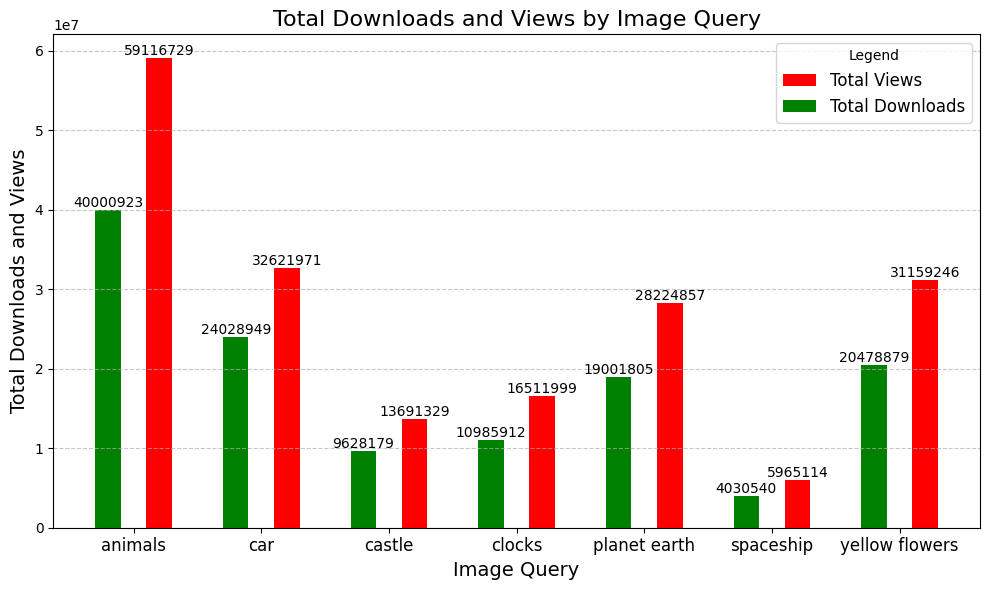

In [117]:
img_views_downloads_grouped = df.groupby('image_query')[["img_views", "img_downloads"]].sum()

plt.figure(figsize=(10, 6))
x = np.arange(len(img_views_downloads_grouped.index))
width = 0.2

bars_views = plt.bar(x + width, img_views_downloads_grouped['img_views'], width, label='Total Views', color='red')
bars_downloads = plt.bar(x - width, img_views_downloads_grouped['img_downloads'], width, label='Total Downloads', color='green')

for bars in [bars_views, bars_downloads]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(bar.get_height()),
            ha='center', va='bottom', fontsize=10
        )

plt.title('Total Downloads and Views by Image Query', fontsize=16)
plt.xlabel('Image Query', fontsize=14)
plt.ylabel('Total Downloads and Views', fontsize=14)
plt.xticks(x, img_views_downloads_grouped.index, fontsize=12)
plt.legend(title='Legend', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

The most popular category by Views and Downloads is "**Animals**". "**Car**", "**Yellow Flowers**", "**Planet Earth**" are 2nd, 3rd and 4th places respectively. "**Clocks**", "**Castle**" and "**Spaceship**" are a lot less viewable and downloadable.

## The Most Liked and Commented Queries


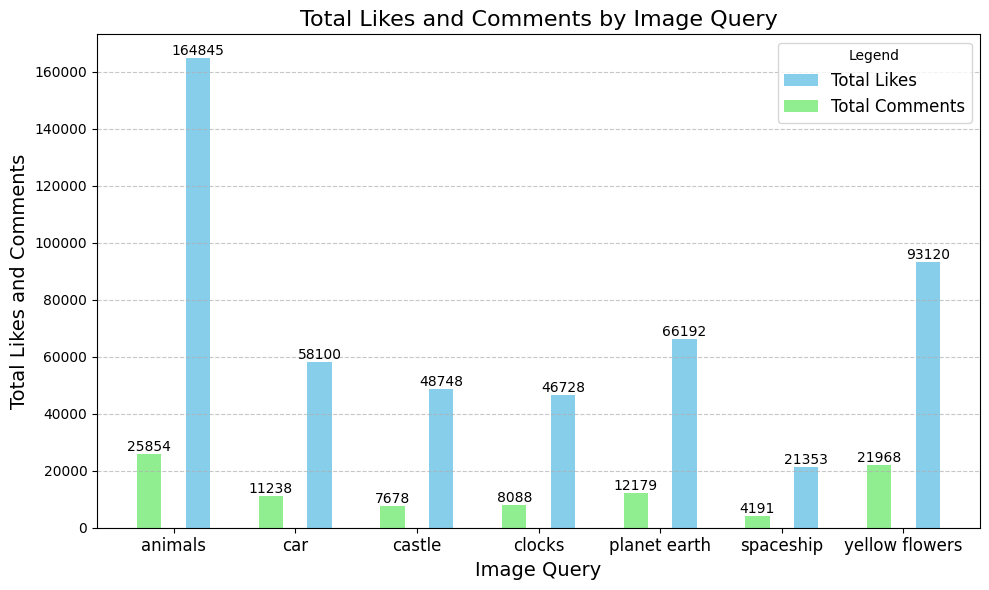

In [118]:
img_likes_comments_grouped = df.groupby('image_query')[["img_likes", "img_comments"]].sum()

plt.figure(figsize=(10, 6))
x = np.arange(len(img_likes_comments_grouped.index))
width = 0.2

bars_likes = plt.bar(x + width, img_likes_comments_grouped['img_likes'], width, label='Total Likes', color='skyblue')
bars_comments = plt.bar(x - width, img_likes_comments_grouped['img_comments'], width, label='Total Comments', color='lightgreen')

for bars in [bars_likes, bars_comments]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            str(bar.get_height()),
            ha='center', va='bottom', fontsize=10
        )

plt.title('Total Likes and Comments by Image Query', fontsize=16)
plt.xlabel('Image Query', fontsize=14)
plt.ylabel('Total Likes and Comments', fontsize=14)
plt.xticks(x, img_likes_comments_grouped.index, fontsize=12)
plt.legend(title='Legend', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

"**Animals**" category has the most likes and comments. 2nd place goes to "**Yellow Flowers**". Even though "**Animals**" have twice as many likes as "**Yellow Flowers**", there's not much difference in the comments. We can conclude that "**Animals**" are liked more often than "**Yellow Flowers**", but comments are about the same.

## The Most Popular Tags

Each record has it own set of tags. They are stored in "**img_tag**" column in string format, divided with coma. For proper tag analytics, we will split "**img_tag**" column by coma and create aditional rows for each tag.

In [119]:
new_df = df
new_df['image_tags'] = new_df['img_tags'].str.split(', ')
df_exploded = new_df.explode('image_tags', ignore_index=True)

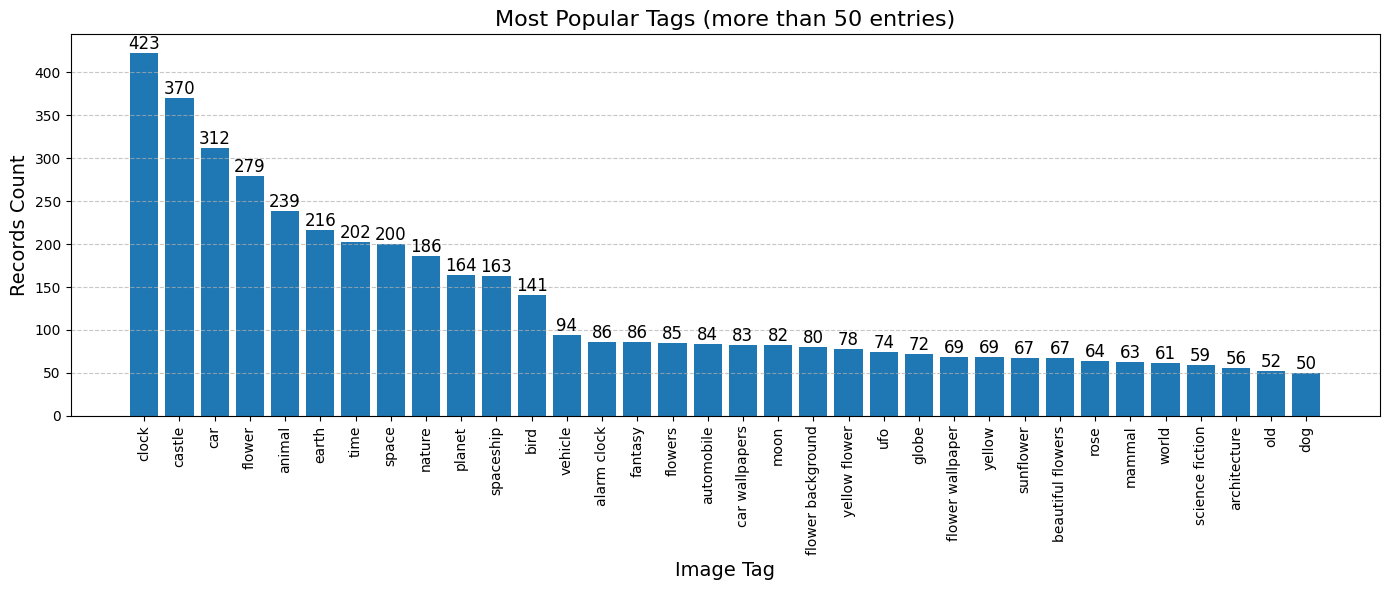

In [120]:
tag_counts = df_exploded.groupby('image_tags').size().reset_index(name='count')

filtered_tags = tag_counts[tag_counts['count'] >= 50]
filtered_tags = filtered_tags.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(filtered_tags["image_tags"], filtered_tags["count"])

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(bar.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.title('Most Popular Tags (more than 50 entries)', fontsize=16)
plt.xlabel('Image Tag', fontsize=14)
plt.ylabel('Records Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## The Most Popular Authors

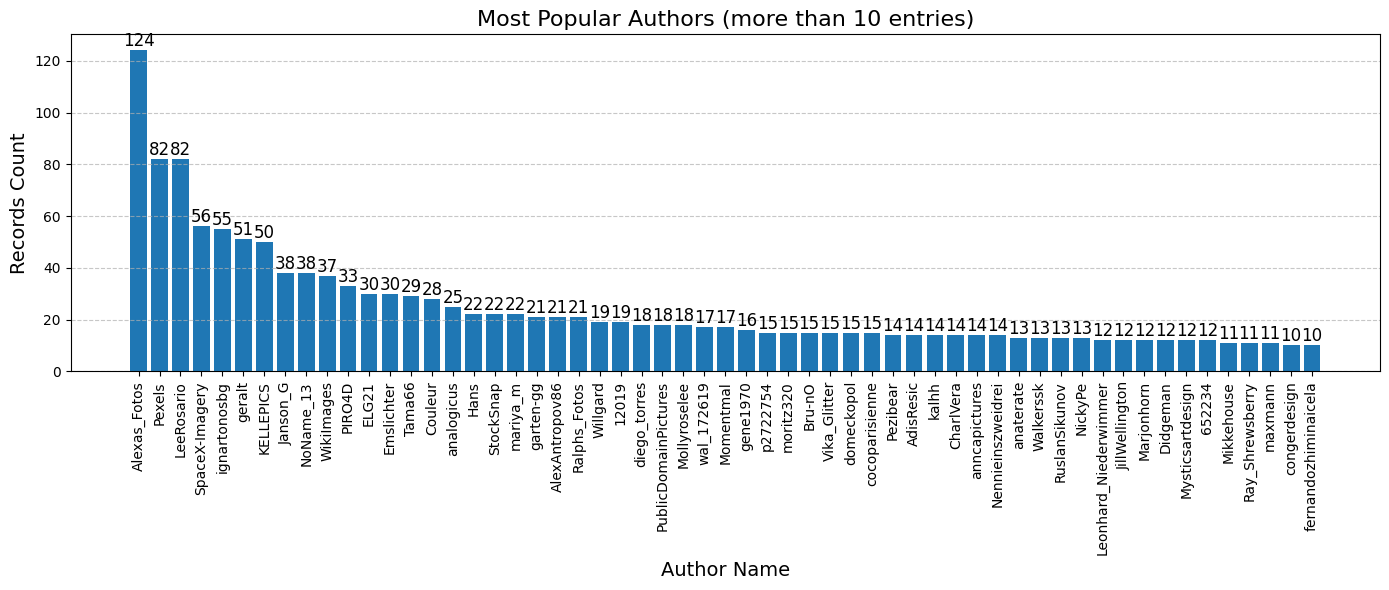

In [121]:
authors = df.groupby("author_name").size().reset_index(name='count')


filtered_authors = authors[authors['count'] >= 10]
filtered_authors = filtered_authors.sort_values(by='count', ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(filtered_authors["author_name"], filtered_authors["count"])

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        str(bar.get_height()),
        ha='center', va='bottom', fontsize=12
    )

plt.title('Most Popular Authors (more than 10 entries)', fontsize=16)
plt.xlabel('Author Name', fontsize=14)
plt.ylabel('Records Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Top 5 Authors by Tags Distribution

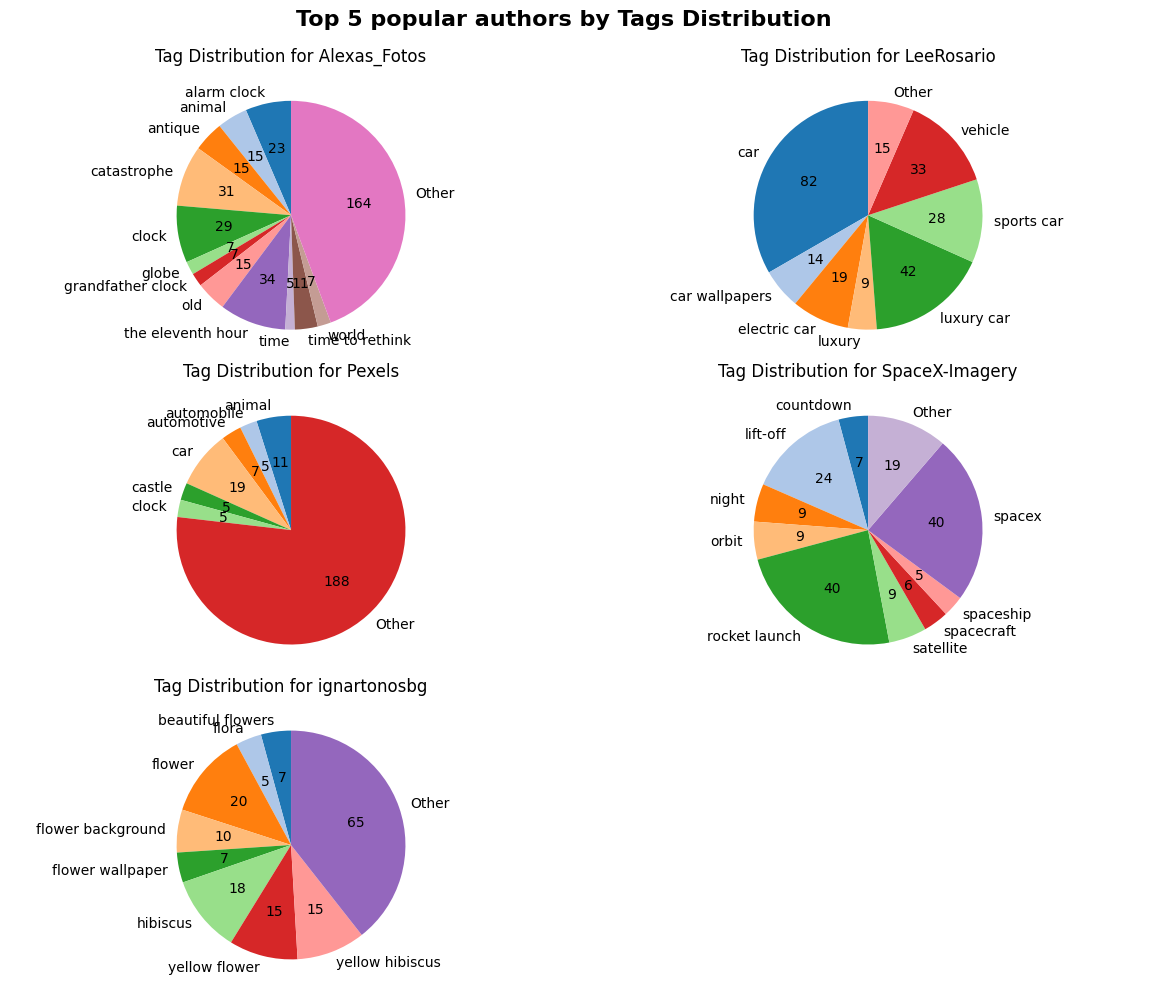

In [122]:
top5_authors_list = ["Alexas_Fotos", "Pexels", "LeeRosario", "SpaceX-Imagery", "ignartonosbg"]
top5_authors_df = df_exploded[df_exploded['author_name'].isin(top5_authors_list)]

top5_authors_grouped = top5_authors_df.groupby(['author_name', 'image_tags']).size().reset_index(name='count')


authors = top5_authors_grouped['author_name'].unique()
threshold = 5

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for ax in axes[4:]:
    ax.axis('off')

for i, author in enumerate(authors):
    ax = axes[i]
    author_data = top5_authors_grouped[top5_authors_grouped['author_name'] == author]

    large_tags = author_data[author_data['count'] >= threshold]
    small_tags = author_data[author_data['count'] < threshold]

    if not small_tags.empty:
        other_row = pd.DataFrame([{
            'author_name': author,
            'image_tags': 'Other',
            'count': small_tags['count'].sum()
        }])
        large_tags = pd.concat([large_tags, other_row], ignore_index=True)

    def func(pct, allvalues):
        absolute = int(pct / 100.*sum(allvalues))
        return f'{absolute}'

    ax.pie(
        large_tags['count'],
        labels=large_tags['image_tags'],
        autopct=lambda pct: func(pct, large_tags['count']),
        startangle=90,
        colors=plt.cm.tab20.colors[:len(large_tags)]
    )

    ax.set_title(f'Tag Distribution for {author}', fontsize=12, pad=20)

    ax.axis('equal')

fig.suptitle('Top 5 popular authors by Tags Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



**Alexas_Fotos** has made the most number of images (124). From pie chart we can say that his main direction of art are "**Clocks**".

**LeeRosario** main direction is connected with "**Cars**".

**Pexels** doesn`t have any particular art direction, so we can assume he's working in different directions.

**SpaceX-Imagery** main direction is "**Space**" and "**Spaceships**"

**ignartonosbg** main direction is "**Flowers**"
